In [3]:
import yaml
import cv2
import os
import pandas as pd
import zipfile
import requests
from collections import Counter

## **Image Loading**

In [3]:
Path = 'C:\\Users\\jorge\\Documents\\CV\\CSWK\\african-wildlife_original.yaml'

In [5]:
# Loads the YAML File
with open(Path, "r", encoding="utf-8") as f:
    data = yaml.safe_load(f)

print("Contenido del YAML:")
print(data)

Contenido del YAML:
{'path': '../datasets/african-wildlife', 'train': 'train/images', 'val': 'valid/images', 'test': 'test/images', 'names': {0: 'buffalo', 1: 'elephant', 2: 'rhino', 3: 'zebra'}, 'download': 'https://github.com/ultralytics/assets/releases/download/v0.0.0/african-wildlife.zip'}


## **Dataset Exploration**

In [7]:
train_images_dir = "C:\\Users\\jorge\\Documents\\CV\\CSWK\\datasets\\african-wildlife\\train\\images"

valid_extensions = ('.jpg', '.png', '.jpeg')
all_files = os.listdir(train_images_dir)

image_files = [
    file_name for file_name in all_files if file_name.lower().endswith(valid_extensions)
]

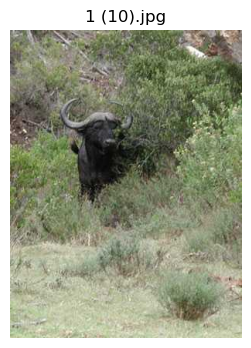

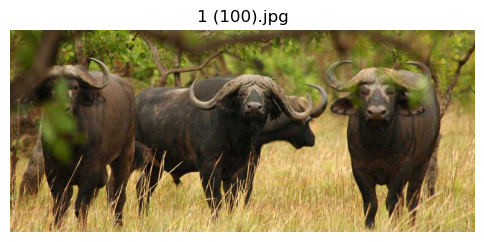

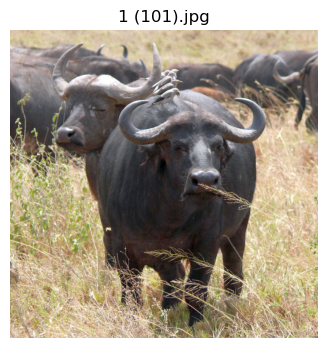

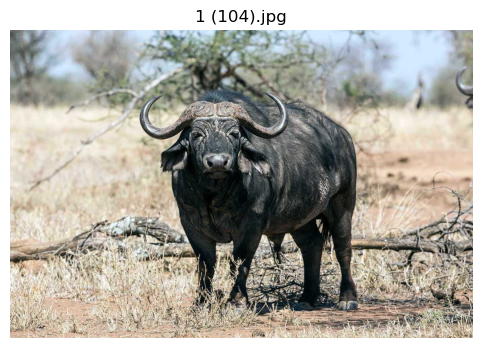

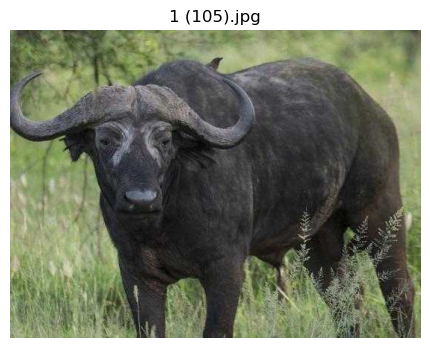

In [9]:
for filename in image_files[:5]:
    img_path = os.path.join(train_images_dir, filename)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(6, 4))
    plt.imshow(img)
    plt.title(filename)
    plt.axis("off")
    plt.show()
    

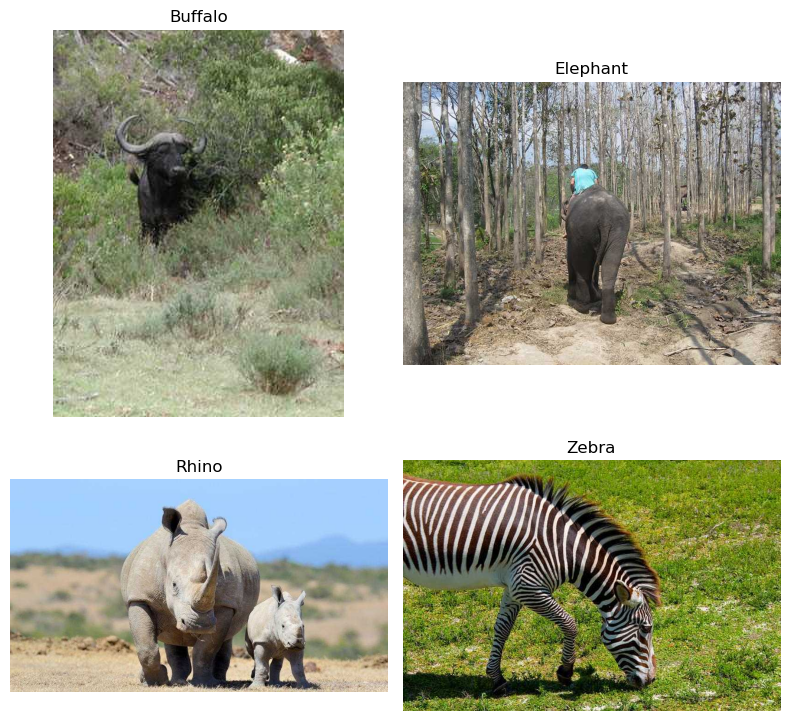

In [16]:
train_images_dir = "C:\\Users\\jorge\\Documents\\CV\\CSWK\\datasets\\african-wildlife\\train\\images"

# Class mapping based on filename prefix
label_mapping = {
    "1": "buffalo",
    "2": "elephant",
    "3": "rhino",
    "4": "zebra"
}

sample_images = {}

# Gather one image per class
for file_name in os.listdir(train_images_dir):
    if file_name.lower().endswith(('.jpg', '.jpeg', '.png')):
        class_id = file_name.split(" ")[0][0]
        class_name = label_mapping.get(class_id)
        if class_name and class_name not in sample_images:
            sample_images[class_name] = os.path.join(train_images_dir, file_name)
        if len(sample_images) == 4:
            break

plt.figure(figsize=(8, 8))
for idx, (class_name, file_path) in enumerate(sample_images.items()):
    img = cv2.imread(file_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    plt.subplot(2, 2, idx + 1)
    plt.imshow(img)
    plt.title(class_name.capitalize())
    plt.axis('off')

plt.tight_layout()
plt.show()


In [25]:
train_images_dir = "C:\\Users\\jorge\\Documents\\CV\\CSWK\\datasets\\african-wildlife\\train\\images"

label_mapping = {
    "1": "buffalo",
    "2": "elephant",
    "3": "rhino",
    "4": "zebra"
}

# Determine class from filename
class_names = []
for file_name in image_files:
    first_char = file_name.split(" ")[0][0]  # Get the very first character
    class_name = label_mapping.get(first_char)
    class_names.append(class_name)

# Count occurrences
class_counts = Counter(class_names)

for classes, count in class_counts.items():
    print(f"{classes}: {count} images")

buffalo: 265 images
elephant: 268 images
rhino: 265 images
zebra: 254 images


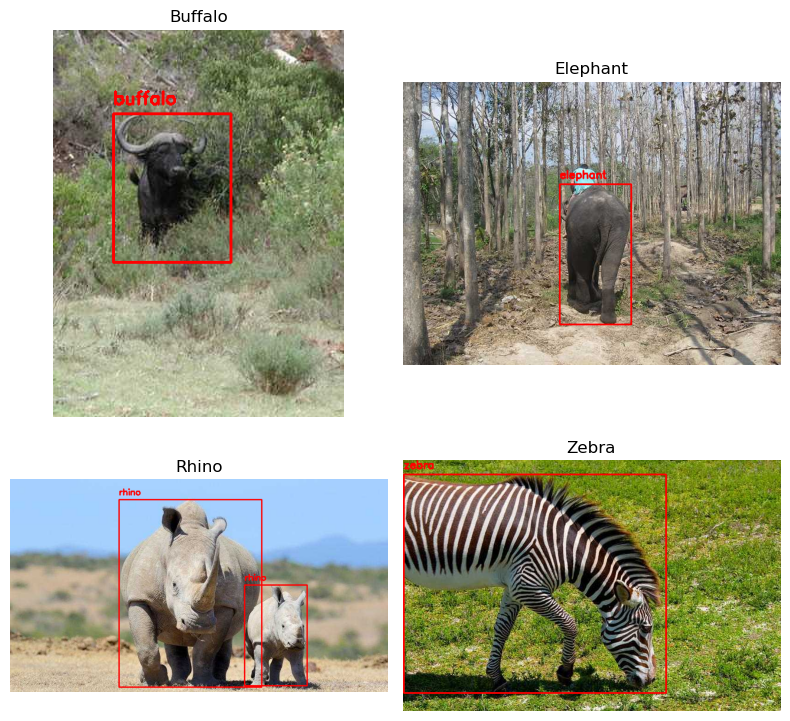

In [18]:
train_images_dir = "C:\\Users\\jorge\\Documents\\CV\\CSWK\\datasets\\african-wildlife\\train\\images"
train_labels_dir = "C:\\Users\\jorge\\Documents\\CV\\CSWK\\datasets\\african-wildlife\\train\\labels" 

label_mapping = { 
    "1": "buffalo",
    "2": "elephant",
    "3": "rhino",
    "4": "zebra"
}

sample_images = {}

# Select the first image per class
for file_name in os.listdir(train_images_dir):  # Loop over image files
    if file_name.lower().endswith(('.jpg', '.jpeg', '.png')):  # Check for valid image extensions
        first_digit = file_name[0]  # Get the first character (class ID)
        class_name = label_mapping.get(first_digit)  # Map digit to class name

        if class_name and class_name not in sample_images:  # If this class isn't already selected
            sample_images[class_name] = file_name  # Save the first image found for this class

        if len(sample_images) == 4:  # Stop if we have one image per class
            break

plt.figure(figsize=(8, 8))  # Set figure size

for idx, (class_name, image_file) in enumerate(sample_images.items()):  # Loop over selected images
    image_path = os.path.join(train_images_dir, image_file)  # Full path to the image
    label_path = os.path.join(train_labels_dir, os.path.splitext(image_file)[0] + ".txt")  # Corresponding label path

    img = cv2.imread(image_path) 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    h, w, _ = img.shape 

    # Draws bounding boxes
    with open(label_path, 'r') as f:
        for line in f:
            parts = line.strip().split()  # Split label line into components
            class_id = int(parts[0])  # Class ID from label file
            x_center, y_center, width, height = map(float, parts[1:])  # Normalized bbox coordinates

            # Converts YOLO format (normalized) to pixel coordinates
            x_center *= w  
            y_center *= h  
            width *= w  
            height *= h  

            # Calculates bounding box corners
            x1 = int(x_center - width / 2)
            y1 = int(y_center - height / 2)
            x2 = int(x_center + width / 2)
            y2 = int(y_center + height / 2)

            cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)  # Draws rectangle on image
            cv2.putText(
                img,
                label_mapping[str(int(class_id)+1)],  # Converts 0-based label to 1-based name
                (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.6,
                (255, 0, 0),
                2
            )

    plt.subplot(2, 2, idx + 1) 
    plt.imshow(img)  
    plt.title(class_name.capitalize())  
    plt.axis('off')  

plt.tight_layout()  
plt.show()  

